In [1]:
# Dependencies and Setup 
# %matplotlib notebook = MESSES UP WHOLE THING... notebook->inline or SKIP line
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City & Ride Data
City_data_df = pd.read_csv("data/city_data.csv")   
Ride_data_df = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
merged_pyber_df = pd.merge(Ride_data_df, City_data_df, how="left", on=["city", "city"])

# 1st ATTEMPT: merged_pyber_df = pd.merge( city_data, ride_data, on="city")
# Display the data table for preview

## Bubble Plot of Ride Sharing Data

In [2]:
# divided the merged df into 3 groups
Urban_df = merged_pyber_df.loc[merged_pyber_df["type"]=="Urban"]
Suburban_df = merged_pyber_df.loc[merged_pyber_df["type"]=="Suburban"]
Rural_df = merged_pyber_df.loc[merged_pyber_df["type"]=="Rural"]

# ALTERNATE WAY: Urban_df = merged_pyber_df[merged_pyber_df["type"] == "Urban"]

In [3]:
# Obtain the x coordinates for each of the three city types
## sort it to tally row count...Total Number of Rides (Per City)
## create df and save as variable
Grouped_Urban_Ride_Total_df = Urban_df.groupby('city').count()
Grouped_Suburban_Ride_Total_df = Suburban_df.groupby('city').count()
Grouped_Rural_Ride_Total_df = Rural_df.groupby('city').count()

# Note: don't modify df...just pull column into scatterplot

In [4]:
# Obtain the y coordinates for each of the three city types
## y-values = Average Fare ($)

Grouped_Urban_Fare_Avg_df = Urban_df.groupby('city').mean()
Grouped_Suburban_Fare_Avg_df = Suburban_df.groupby('city').mean()
Grouped_Rural_Fare_Avg_df = Rural_df.groupby('city').mean()

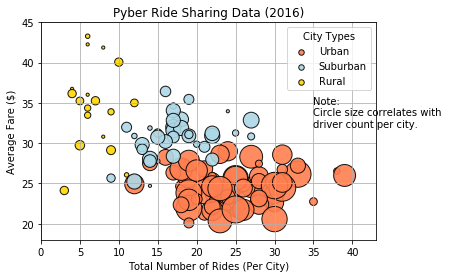

In [5]:
# Build the scatter plots for each city types
# Incorporate the other graph properties... ? 
## s= ... is diameter of bubbles
## alpha is 0-1... 0=transparent 1= solid..., alpha=0.75) 
# Pyber color scheme (Gold, Light Sky Blue, and Light Coral)

plt.scatter(Grouped_Urban_Ride_Total_df["type"], Grouped_Urban_Fare_Avg_df["fare"], 
            s=10*Grouped_Urban_Fare_Avg_df["driver_count"], facecolors="coral", 
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.9, label="Urban") 
          
plt.scatter(Grouped_Suburban_Ride_Total_df["type"], Grouped_Suburban_Fare_Avg_df["fare"], 
            s=10*Grouped_Suburban_Fare_Avg_df["driver_count"], facecolors="lightblue", 
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.9, label="Suburban") 

plt.scatter(Grouped_Rural_Ride_Total_df["type"], Grouped_Rural_Fare_Avg_df["fare"], 
            s=10*Grouped_Rural_Fare_Avg_df["driver_count"], facecolors="gold", 
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.9, label="Rural") 

# Create a legend...see 1.4 legendary temp. for creating handles...urban
lgnd = plt.legend(fontsize="10", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="upper right", title="City Types", labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

## x & y limits 
plt.xlim(0,43)
plt.ylim(18,45)

## Create a title, x label, and y label for our chart
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

# Incorporate a text label regarding circle size ???
plt.text(35, 32, "Note:\nCircle size correlates with\ndriver count per city.")

# Save Figure to data folder
plt.savefig("DataFolder/PyberRideShareData.png")
# Show plot
plt.show()

## Total Fares by City Type

In [6]:
# Calculate Type Percents = total fares / urban share...sub...rural...UNNECESSARY?? BC 
    # Automatically finds the percentages of each part of the pie chart 
# Urban_Sum_Fares = Urban_df["fare"].sum()
# Suburban_Sum_Fares = Suburban_df["fare"].sum()
# Rural_Sum_Fares = Rural_df["fare"].sum()
# sizes = [39854.38, 19356.33, 4327.93]

type_percents = 100 * merged_pyber_df.groupby(["type"]).sum()["fare"] / merged_pyber_df["fare"].sum()

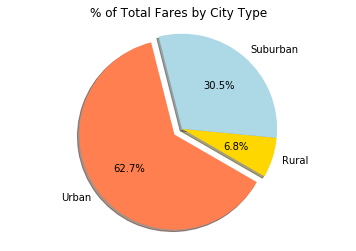

In [7]:
# Build Pie Chart
plt.pie(type_percents, 
        labels = ["Rural", "Suburban", "Urban"], 
        colors = ["gold", "lightblue", "coral"], 
        explode = (0, 0, 0.1), 
        autopct="%1.1f%%", shadow=True, startangle=-30)
plt.title("% of Total Fares by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("DataFolder/PercentFaresCityType.png")

# Show Figure
plt.show()

## Total Rides by City Type

In [8]:
# Calculate Ride Percents
Urban_Sum_Total_Rides = Grouped_Urban_Ride_Total_df["type"].sum()
Suburban_Sum_Total_Rides = Grouped_Suburban_Ride_Total_df["type"].sum()
Rural_Sum_Total_Rides = Grouped_Rural_Ride_Total_df["type"].sum()

# Urban_Sum_Total_Rides=1625, Suburban_Sum_Total_Rides=625, Rural_Sum_Total_Rides=125

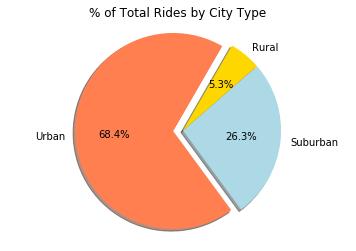

In [9]:
# Build Pie Chart...DIFFERENT FROM ABOVE
labels = ["Urban", "Suburban", "Rural"] 
sizes = [1625, 625, 125]
colors = ["coral", "lightblue", "gold"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", 
        shadow=True, startangle=60)

plt.axis("equal")
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("DataFolder/PercentRidesCityType.png")

# Show Figure
plt.show()

## Total Drivers by City Type

In [10]:
# divided the City_data_df into 3 groups
Urban_Drivers_df = City_data_df.loc[City_data_df["type"]=="Urban"]
Suburban_Drivers_df = City_data_df.loc[City_data_df["type"]=="Suburban"]
Rural_Drivers_df = City_data_df.loc[City_data_df["type"]=="Rural"]

In [11]:
Urban_Sum_Total_Drivers = Urban_Drivers_df["driver_count"].sum()
Suburban_Sum_Total_Drivers = Suburban_Drivers_df["driver_count"].sum()
Rural_Sum_Total_Drivers = Rural_Drivers_df["driver_count"].sum()

# Urban_Sum_Total_Drivers=2405, Suburban_Sum_Total_Drivers=490, Rural_Sum_Total_Drivers=78

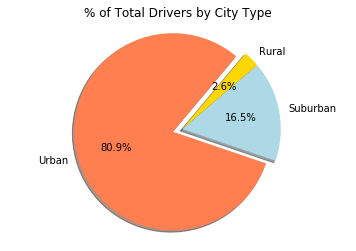

In [12]:
# Build Pie Charts
sizes = [2405, 490, 78]
labels = ["Urban", "Suburban", "Rural"] 
colors = ["coral", "lightblue", "gold"]
explode = (0.1, 0, 0)

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%", shadow=True, startangle=50)

plt.axis("equal")

plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("DataFolder/PercentDriversCityType.png")

# Show Figure
plt.show()

In [13]:
# ??? drop_duplicates is key     for not repeating the same city twice